# 3: Trip times from hubs to highways

###### Notebook to calculate trip distances from given locations to all other nodes in the area. With the distances the trip times can be calculated in order to save it in a dataframe with excel export for future usage in other scripts. The current script calculates trip times for driving. Edit travel_speed & network_type to adjust it for different kinds and ways of transportation. For another location edit variable called place.



### Setting up packages and variables

In [1]:
import networkx as nx
import osmnx as ox
ox.config(log_console=True, use_cache=True)
ox.__version__
import pandas as pd
ox.config(use_cache=True, log_console=True)

# configure the place, network type
place = 'Binnenstad, Delft, Netherlands'
network_type = 'all'

# theme colors
miev_pink = '#f06675'
miev_blue = '#2c3174'
miev_yellow = '#fbe56d'

/root/venv/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


### Download network

In [2]:
# download the street network with inner city + 1km buffer
G = ox.graph_from_place(place, network_type, buffer_dist=1000)

# download street network for inner city
G_nonbuffer = ox.graph_from_place(place, network_type)

### Filter nodes outside of city center

In [3]:
# extract nodes and edges from both graphs (with buffer and without)
nodes1, edges1 = ox.graph_to_gdfs(G)
nodes2, edges2 = ox.graph_to_gdfs(G_nonbuffer)

# Extracts inner city nodes from the 1 km extra buffer city center node list
outer_join = nodes1.merge(nodes2, how = 'outer', indicator = True)
anti_join = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
nodes_new = anti_join

# join the new nodes with existing edges
G_outer = ox.graph_from_gdfs(nodes_new, edges1)

### Shortest path from outer city nodes to highway node (takes around 10 minutes)

In [4]:
# redefine place to get Delft entirely
place = 'Delft Netherlands'

# load in entire Delft for highway entrances 
G_Delft = ox.graph_from_place(place, network_type = 'all')

# empty dataframe necessary to append loop results
df = pd.DataFrame()  

# start index for loop
loop_index = 0

# make list out of G
G_outer_list = list(G_outer)
G_Delft_list = list(G_Delft)

# find max index for when the loop needs to stop
max_index = G_Delft_list.index(list(G_Delft)[-1])

# hand picked coordinates of prominent entrances of highways
# find highway 1 in geadataframe
highway1_x = 4.367558
highway1_y = 51.991575
highway1_node_id = ox.nearest_nodes(G_Delft, highway1_x, highway1_y)
highway1_node_index = G_Delft_list.index(highway1_node_id) 

# find highway 2 in geadataframe
highway2_x = 4.358396
highway2_y = 51.989467
highway2_node_id = ox.nearest_nodes(G_Delft, highway2_x, highway2_y)
highway2_node_index = G_Delft_list.index(highway2_node_id) 

# find highway 3 in geadataframe
highway3_x = 4.375451
highway3_y = 52.010823
highway3_node_id = ox.nearest_nodes(G_Delft, highway3_x, highway3_y)
highway3_node_index = G_Delft_list.index(highway3_node_id) 

# find highway 4 in geadataframe
highway4_x = 4.358177
highway4_y = 52.026611
highway4_node_id = ox.nearest_nodes(G_Delft, highway4_x, highway4_y)
highway4_node_index = G_Delft_list.index(highway4_node_id) 

# loop to find total lengths of shortest path
while loop_index < max_index:
    try: 
        # origin is start location, destination is all nodes that you want a shortest path towards
        orig, dest = list(G_Delft)[highway1_node_index], list(G_outer)[loop_index]
        # shortest path function to obtain lenngths
        travel_1 = nx.shortest_path_length(G_Delft, orig, dest, weight='length')
    
        orig, dest = list(G_Delft)[highway2_node_index], list(G_outer)[loop_index]
        # shortest path function to obtain lenngths
        travel_2 = nx.shortest_path_length(G_Delft, orig, dest, weight='length')

        orig, dest = list(G_Delft)[highway3_node_index], list(G_outer)[loop_index]
        # shortest path function to obtain lenngths
        travel_3 = nx.shortest_path_length(G_Delft, orig, dest, weight='length')

        orig, dest = list(G_Delft)[highway4_node_index], list(G_outer)[loop_index]
        # shortest path function to obtain lenngths
        travel_4 = nx.shortest_path_length(G_Delft, orig, dest, weight='length')

        df = df.append({'Node index':[loop_index],'Node ID':[dest],
                        'Travel Dis HW1':[travel_1], 'Travel Dis HW2':[travel_2],
                        'Travel Dis HW3':[travel_3], 'Travel Dis HW4':[travel_4]},
                        ignore_index=True)

    # exception to print when a node doesn't connect (shouldn't have any of these in principle)   
    except:
        print('no path found')

    # +1 the loop to shortest path towards all nodes
    loop_index += 1

df.to_excel("data/distances_highway.xlsx")

no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no path found
no pat

In [5]:
df = pd.read_excel("data/distances_highway.xlsx")

df['Travel Dis HW1'] = df['Travel Dis HW1'].str.strip('[]')
df['Travel Dis HW2'] = df['Travel Dis HW2'].str.strip('[]')
df['Travel Dis HW3'] = df['Travel Dis HW3'].str.strip('[]')
df['Travel Dis HW4'] = df['Travel Dis HW4'].str.strip('[]')

# highways_distances = ['Travel Dis HW1', 'Travel Dis HW2', 'Travel Dis HW3', 'Travel Dis HW4']
# df[highways_distances] = df[highways_distances].str.strip('[]')

# configure travel speed and convert to meter per seconds
travel_speed = int(50.0) #car speed in km/hour
travel_speed_ms = travel_speed / 3.6 # to m/s

print('travel speed used in calculation: ',travel_speed_ms, 'm/s')

# from object to numeric values to calculate with it (or float)
df['Travel Dis HW1'] = pd.to_numeric(df['Travel Dis HW1'])
df['Travel Dis HW2'] = pd.to_numeric(df['Travel Dis HW2'])
df['Travel Dis HW3'] = pd.to_numeric(df['Travel Dis HW3'])
df['Travel Dis HW4'] = pd.to_numeric(df['Travel Dis HW4'])

# get travel time in seconds by multiplying travel speed with distance
df['Travel Time HW1'] = df['Travel Dis HW1'] / travel_speed_ms
df['Travel Time HW2'] = df['Travel Dis HW2'] / travel_speed_ms
df['Travel Time HW3'] = df['Travel Dis HW3'] / travel_speed_ms
df['Travel Time HW4'] = df['Travel Dis HW4'] / travel_speed_ms

# convert travel time to minutes (optional)
df['Travel Time HW1'] = df['Travel Time HW1'] / 60.0
df['Travel Time HW2'] = df['Travel Time HW2'] / 60.0
df['Travel Time HW3'] = df['Travel Time HW3'] / 60.0
df['Travel Time HW4'] = df['Travel Time HW4'] / 60.0

df = df.drop(columns='Unnamed: 0')
df = df.round(decimals=2)

df.to_excel("data/final_time_highway.xlsx")

travel speed used in calculation:  13.88888888888889 m/s


### Plot the highway nodes

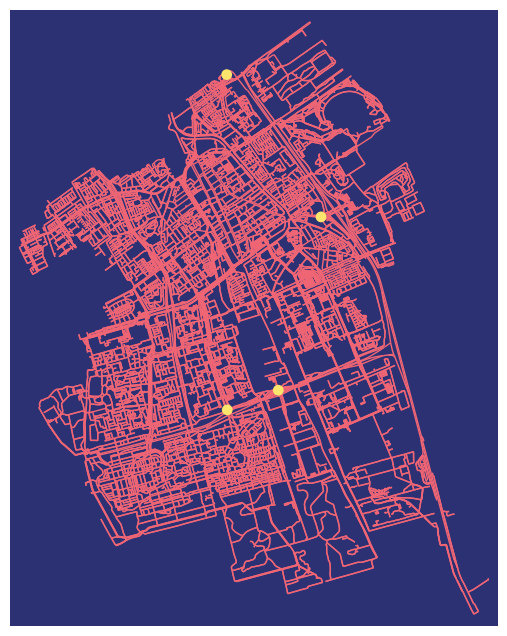

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [6]:
highways = [highway1_node_id, highway2_node_id,highway3_node_id, highway4_node_id]

# extract nodes and edges from Graph
nodes, edges = ox.graph_to_gdfs(G_Delft)

# make dataframe from extracted nodes
df = nodes

# filter out ID's of top 100 from the nodes
Filter_df  = df[df.index.isin(highways)]

# make new graph from the new nodes dataframe 
G_highway = ox.graph_from_gdfs(Filter_df, edges)

# plot the new graph
ox.plot_graph(G_highway, filepath='data/highways.png', edge_color=miev_pink, bgcolor=miev_blue, node_color= miev_yellow, node_size = 60)

### Extract unnecessary nodes (outside bound of interest which is 1km around the city center)

In [7]:
# Shortest path goes over all nodes in the map, extract unwanted nodes (by providing a list of wished nodes) with this script
# for this particular case the nodes within the city center bounds weren't needed, thus these were extracted

nodes1, edges1 = ox.graph_to_gdfs(G)
nodes2, edges2 = ox.graph_to_gdfs(G_nonbuffer)

# Extracts inner city nodes from the 1 km extra buffer city center node list
outer_join = nodes1.merge(nodes2, how = 'outer', indicator = True)
anti_join = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
nodes_new = anti_join

df = pd.read_excel("data/final_time_highway.xlsx")

Node_outer_list = list(nodes_new)
x = nodes_new['x']
y = nodes_new['y']
target_nodes_id = ox.nearest_nodes(G, x, y)

# source nodes id
sources_nodes_id = nodes1

# target nodes id
target_nodes_id = target_nodes_id

print("No of elements in list source are:", len(sources_nodes_id))
print("No of elements in list target are:", len(target_nodes_id))

# from object to numeric values to calculate with it (or float)
df['Node ID'] = df['Node ID'].str.strip('[]')
df['Node ID'] = pd.to_numeric(df['Node ID'])
df = df.loc[df['Node ID'].isin(target_nodes_id)] # Get rows with set of values

df = df.drop(columns='Unnamed: 0')

print("No of elements in list now are:", len(df))

# check
if len(target_nodes_id) == len(df):
    print('Extraction succeeded')
else:
    print('Extraction might have failed, nodes do not equal target amount of nodes')

df = df.drop(columns='Travel Dis HW1')
df = df.drop(columns='Travel Dis HW2')
df = df.drop(columns='Travel Dis HW3')
df = df.drop(columns='Travel Dis HW4')
df = df.drop(columns='Node index')


df.to_excel("data/final_times_highway_extracted.xlsx")

No of elements in list source are: 6200
No of elements in list target are: 5158
No of elements in list now are: 4580
Extraction might have failed, nodes do not equal target amount of nodes


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8966f7b1-6d03-4f20-86ea-afcd52732bbc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>